In [142]:
import numpy as np
import pandas as pd

# For visualization
import seaborn as sns
from matplotlib import pyplot as plt

# For over sampling and under sampling of data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# For split of the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Importing models to work with
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# To evaludate the models
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, classification_report


In [143]:
data = pd.read_csv(r"C:\Users\anasw\OneDrive\Desktop\Datasets\bank-full - Copy.csv" , sep = ';')
df = pd.DataFrame(data)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [144]:
df.shape

(45211, 17)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [146]:
df.duplicated().sum()

0

In [147]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [148]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Observations
There are no missing values in the dataset. Though it seems that -1 in pdays is actually a value filled out in place of missing values.
There is no duplicates in the dataset.
There are some columns that does have outliers present in the dataset: balance, duration, campaign, pdays and previous.
Dataset looks clean and doesn't contain any garbage information.
There are total 7 numerical and 10 non numerical columns. Data types assigned to columns looks fine as well and doesn't require any changes in types.

In [149]:
#Univariate Analysis: 

def distribution_plot(data, feature, figsize=(8, 5), bins=10, kde=False):
    f2, ax_hist = plt.subplots(
        nrows=1,  # Number of rows of the subplot grid=1
        figsize=figsize,
    )  # creating the 2 subplots
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins)
    ax_hist.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

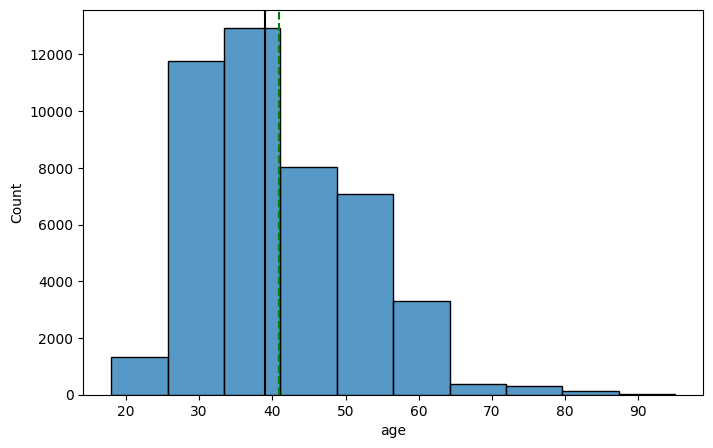

In [150]:
distribution_plot(df, 'age')

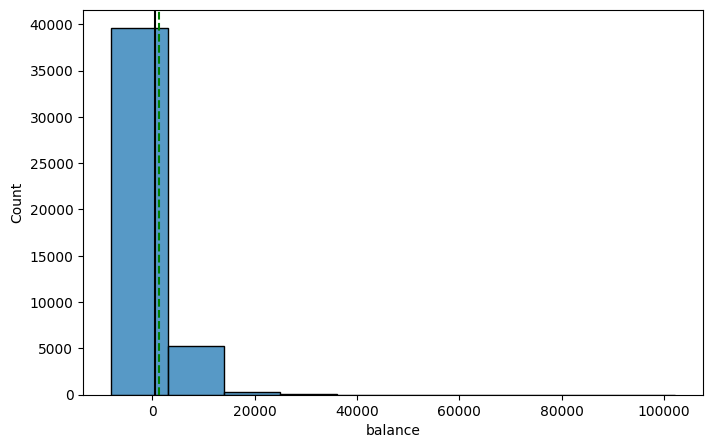

In [151]:
distribution_plot(df, 'balance')

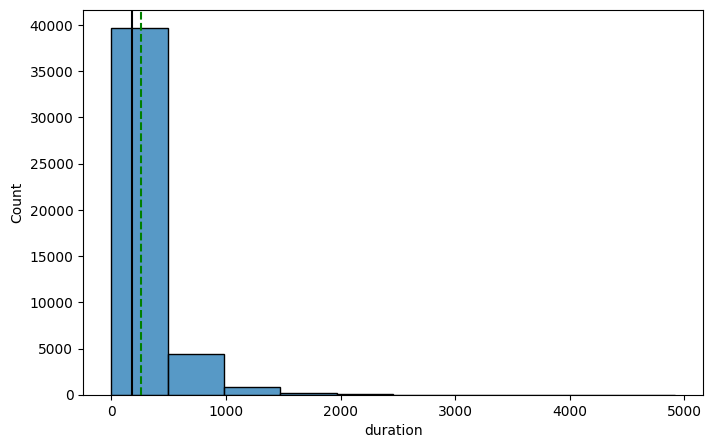

In [152]:
distribution_plot(df, 'duration')

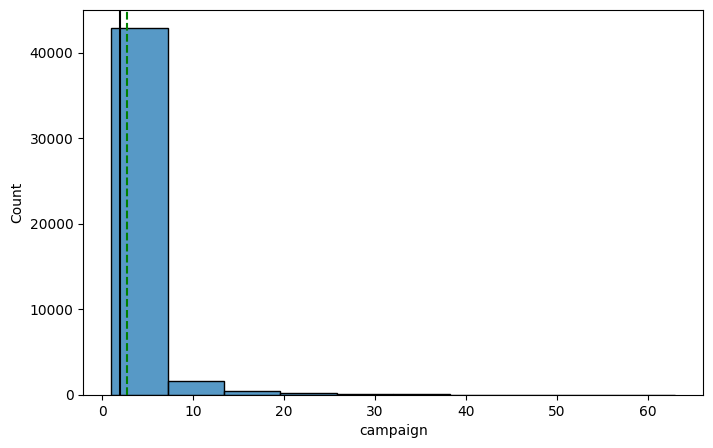

In [153]:
distribution_plot(df, 'campaign')

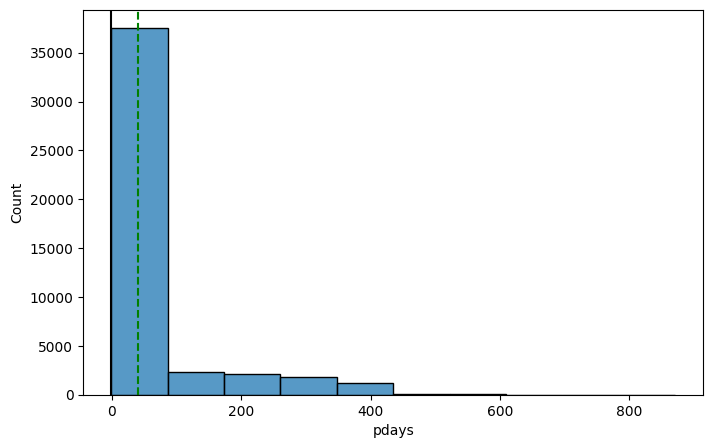

In [154]:
distribution_plot(df, 'pdays')

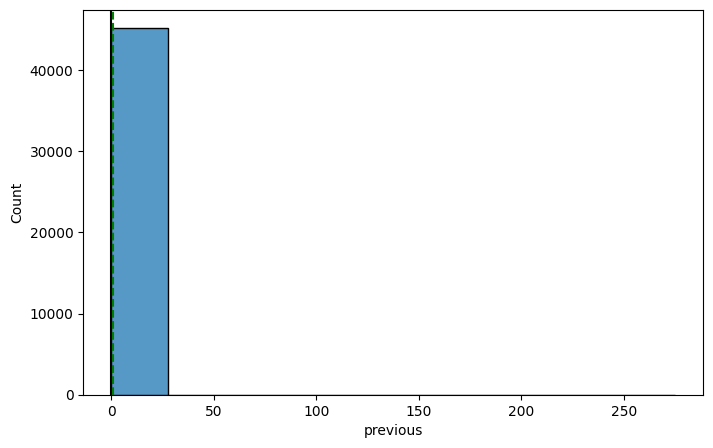

In [155]:
distribution_plot(df, 'previous')

# Observations:

1. We have a lot of variables having right skewness. balance, pdays, campaign, previous, duration and balance.
2. After a bit of anlaysis, you can observe that the values are in reasonable range for these variables and therefore we don't need to treat the outliers.
3. Age is having a bit of normal distribution with a bit of skewness on right side.

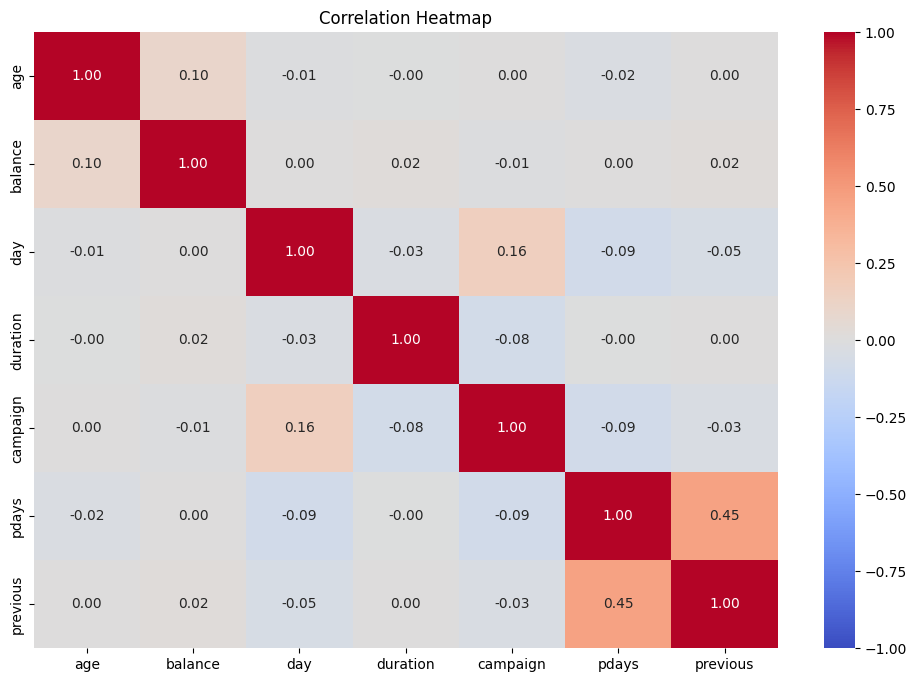

In [156]:
#Bi Variate Analysis 

select_cols = df.select_dtypes('int64')
# Calculate the correlation matrix
correlation_matrix = select_cols.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='y'>

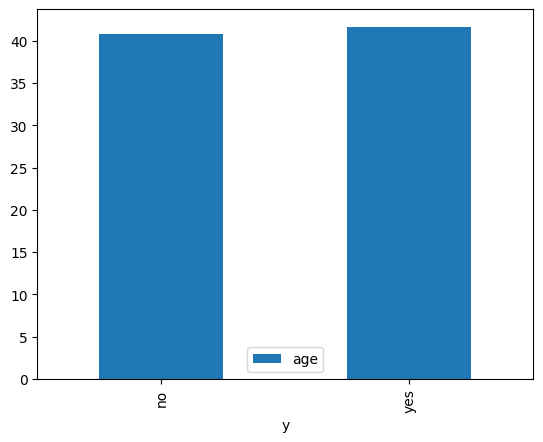

In [157]:
df.pivot_table(index = 'y', values = 'age', aggfunc='mean').plot(kind = 'bar')

<Axes: xlabel='y'>

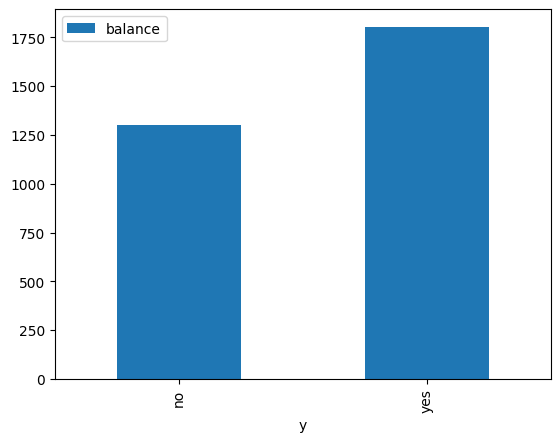

In [158]:
df.pivot_table(index = 'y', values = 'balance', aggfunc='mean').plot(kind = 'bar')

<Axes: xlabel='y'>

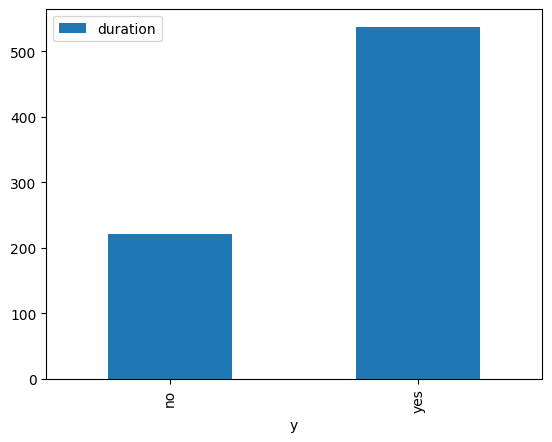

In [159]:
df.pivot_table(index = 'y', values = 'duration', aggfunc='mean').plot(kind = 'bar')

<Axes: xlabel='y'>

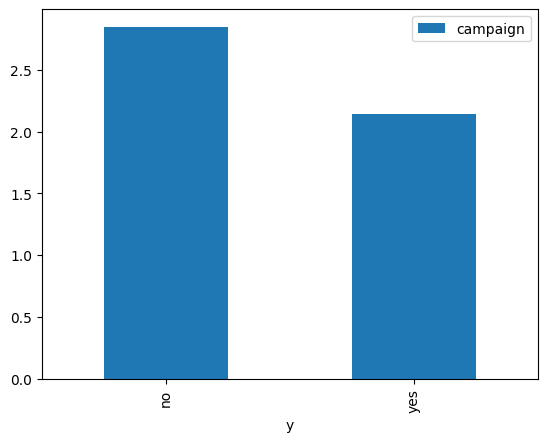

In [160]:
df.pivot_table(index = 'y', values = 'campaign', aggfunc='mean').plot(kind = 'bar')


<Axes: xlabel='y'>

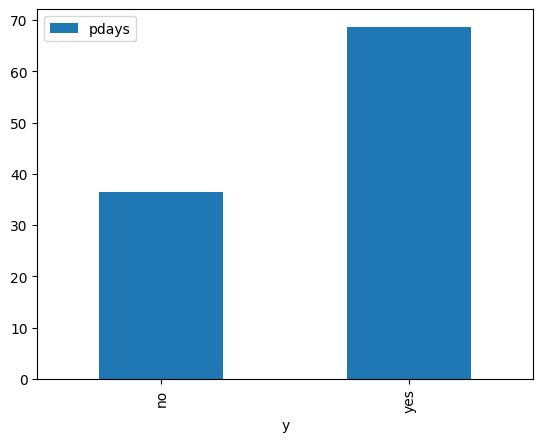

In [161]:
df.pivot_table(index = 'y', values = 'pdays', aggfunc='mean').plot(kind = 'bar')

<Axes: xlabel='y'>

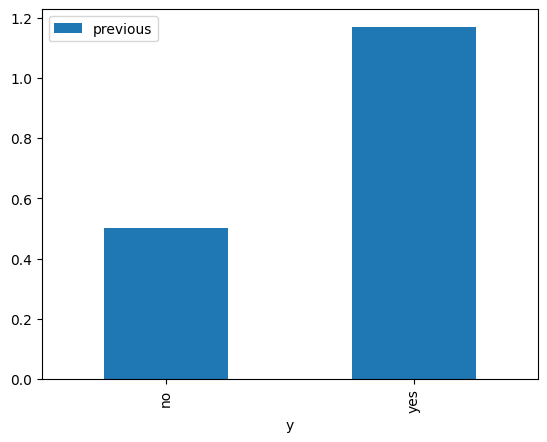

In [162]:
df.pivot_table(index = 'y', values = 'previous', aggfunc='mean').plot(kind = 'bar')

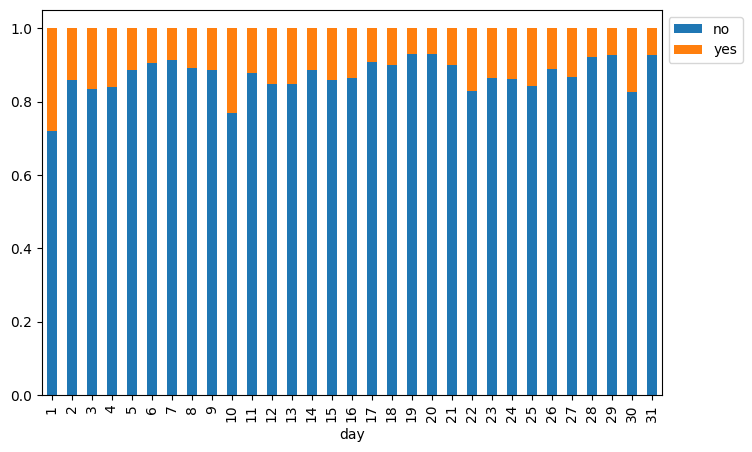

In [163]:
# Define a 100% stacked bar chart
summ = pd.crosstab(df['day'], df['y'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

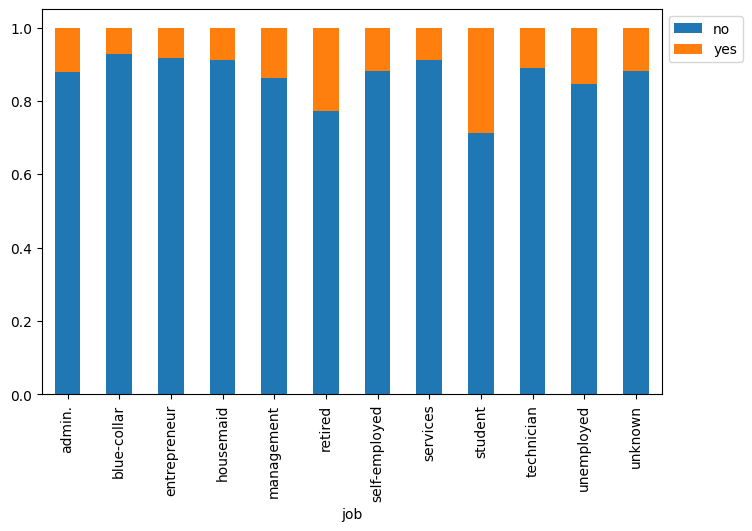

In [164]:
# Define a 100% stacked bar chart
summ = pd.crosstab(df['job'], df['y'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

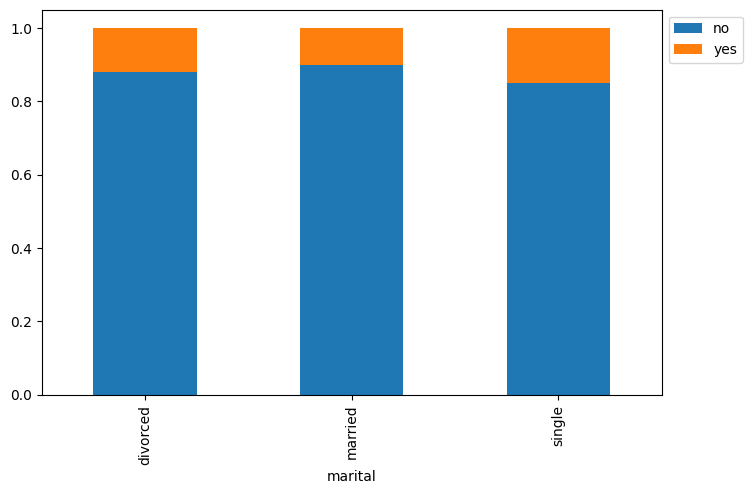

In [165]:
# Define a 100% stacked bar chart
summ = pd.crosstab(df['marital'], df['y'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

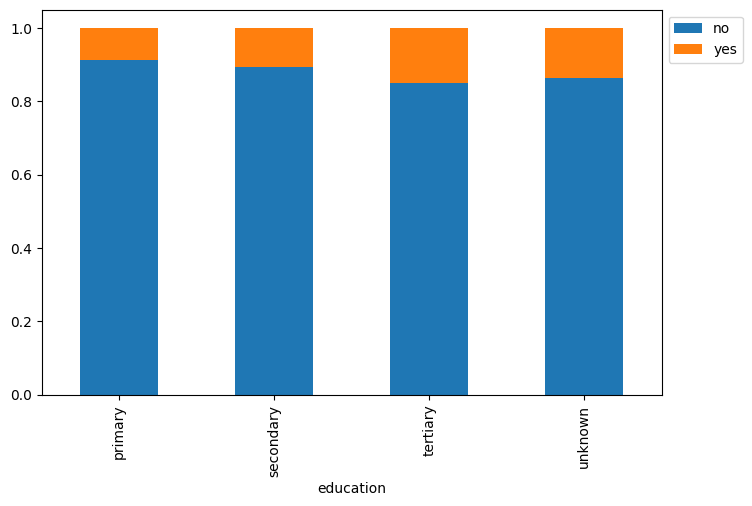

In [166]:
# Define a 100% stacked bar chart
summ = pd.crosstab(df['education'], df['y'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

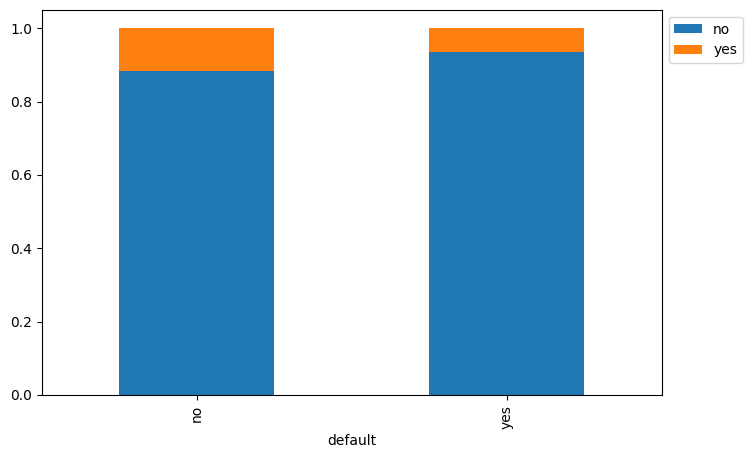

In [167]:
# Define a 100% stacked bar chart
summ = pd.crosstab(df['default'], df['y'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

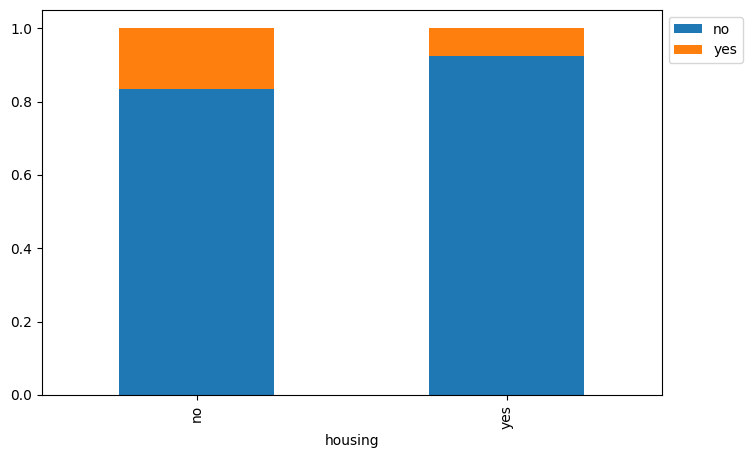

In [168]:
# Define a 100% stacked bar chart
summ = pd.crosstab(df['housing'], df['y'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

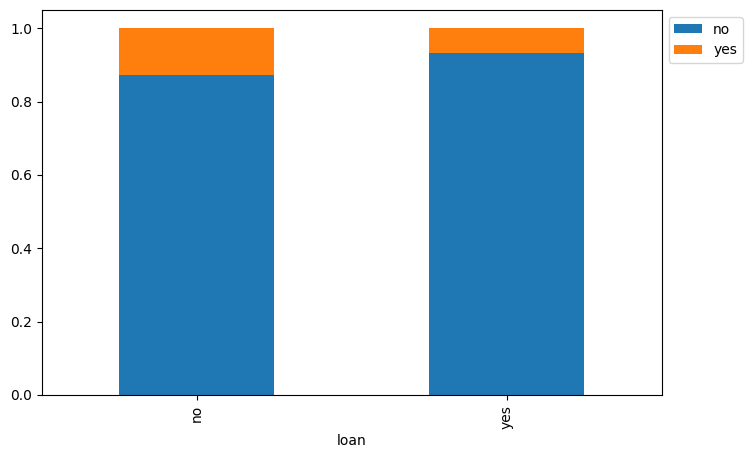

In [169]:
# Define a 100% stacked bar chart
summ = pd.crosstab(df['loan'], df['y'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

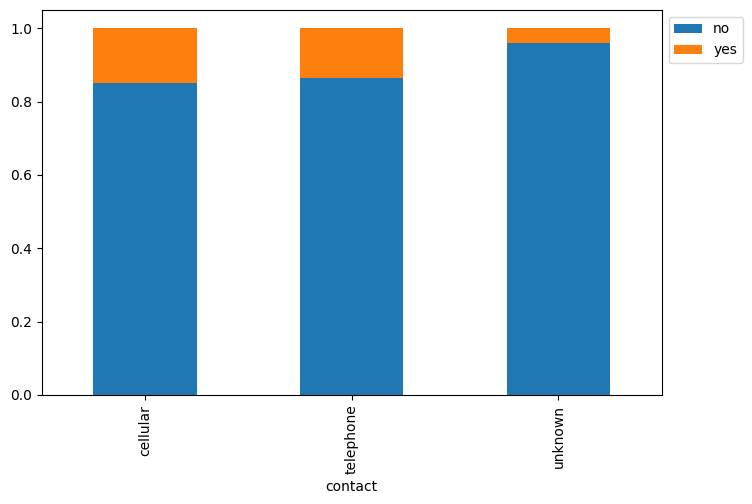

In [170]:
# Define a 100% stacked bar chart
summ = pd.crosstab(df['contact'], df['y'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

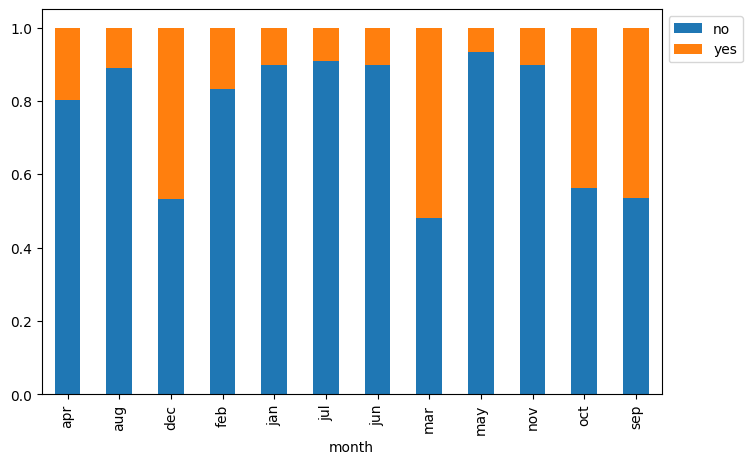

In [171]:
# Define a 100% stacked bar chart
summ = pd.crosstab(df['month'], df['y'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

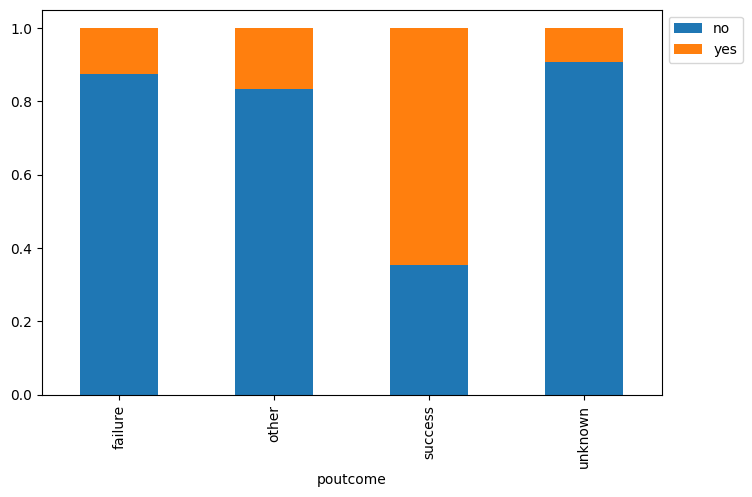

In [172]:
# Define a 100% stacked bar chart
summ = pd.crosstab(df['poutcome'], df['y'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

## Observations:

1. Most of the variables are not showing much of a correlation except pdays and previous. They also have some positive impact on target.
2. Higher the age and balance in account, higher is the change of term deposit.
3. Higher the engagement (duration in seconds), higher is the chance of term deposit.
4. day of the month seems to have a bit of cyclic pattern in terms of term deposit. In every 10 days we are witnessing a bit higher chance of term deposit.
5. Student and retired people amongst all the others seems to have higher chance of doing term predictions.
6. If there was a success in previous marketing campaign then we have higher chance of term deposit. 
7. We are witnessing higher chance of term deposits during end of the calendar year and march (end of financial year).

In [173]:
# Columns to drop - Age and default doesn't seem to provide much of an impact on our target variable

df.drop(columns=['age', 'default'], inplace=True)

In [174]:
mapper = {'cellular': 'phone', 'telephone': 'phone', 'unknown': 'unknown'}
df.replace({'contact': mapper},inplace=True)

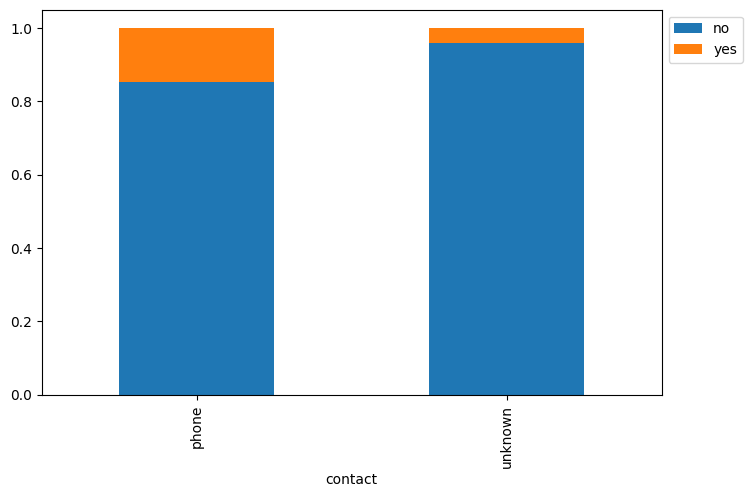

In [175]:
# Define a 100% stacked bar chart
summ = pd.crosstab(df['contact'], df['y'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [176]:
mapper = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df.replace({'month': mapper},inplace=True)

C:\Users\anasw\AppData\Local\Temp\ipykernel_9020\1209325993.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'month': mapper},inplace=True)


In [177]:
df.head()

,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,management,married,tertiary,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,technician,single,secondary,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,entrepreneur,married,secondary,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no
3,blue-collar,married,unknown,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no
4,unknown,single,unknown,1,no,no,unknown,5,5,198,1,-1,0,unknown,no


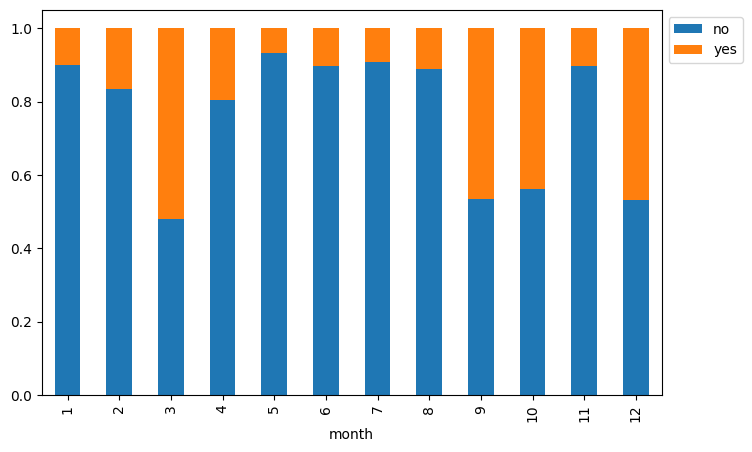

In [178]:
# Define a 100% stacked bar chart
summ = pd.crosstab(df['month'], df['y'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [179]:
categorical_cols = df.select_dtypes(['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(['int64', 'float']).columns.tolist()

In [180]:
categorical_cols.remove('y')

In [181]:
df=pd.get_dummies(df,columns=categorical_cols, drop_first=True , dtype= np.int64)

df.head()

,balance,day,month,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,2143,5,5,261,1,-1,0,no,0,0,...,0,0,1,0,1,0,1,0,0,1
1,29,5,5,151,1,-1,0,no,0,0,...,1,1,0,0,1,0,1,0,0,1
2,2,5,5,76,1,-1,0,no,0,1,...,0,1,0,0,1,1,1,0,0,1
3,1506,5,5,92,1,-1,0,no,1,0,...,0,0,0,1,1,0,1,0,0,1
4,1,5,5,198,1,-1,0,no,0,0,...,1,0,0,1,0,0,1,0,0,1


In [222]:
## We will encode the target variable to 1 and 0 where 1 represents the people who have opted for term deposit.
df["y"] = df["y"].apply(lambda x: 1 if x == "yes" else 0)
df.head()

,balance,day,month,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,2143,5,5,261,1,-1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,29,5,5,151,1,-1,0,0,0,0,...,1,1,0,0,1,0,1,0,0,1
2,2,5,5,76,1,-1,0,0,0,1,...,0,1,0,0,1,1,1,0,0,1
3,1506,5,5,92,1,-1,0,0,1,0,...,0,0,0,1,1,0,1,0,0,1
4,1,5,5,198,1,-1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [197]:
# specifying the independent and dependent set of variables
X = df.drop(["y"], axis=1)
Y = df["y"]

# splitting data in train and test sets
# A good rule of thumb is 70% data in train set and 30% data in test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [198]:
# Analyze the output from train and test data
print(f"Shape of Training set : {X_train.shape}")
print(f"Shape of test set : {X_test.shape}")

print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))

print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set : (31647, 29)
Shape of test set : (13564, 29)
Percentage of classes in training set:
y
0    0.881885
1    0.118115
Name: proportion, dtype: float64
Percentage of classes in test set:
y
0    0.885653
1    0.114347
Name: proportion, dtype: float64


In [247]:
# Random Forest

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_model.score(X_train, y_train) # Calculate the accuracy on train set

1.0

In [248]:
rf_model.score(X_test , y_test)

0.9080654674137423

In [249]:
print(classification_report(y_train, rf_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27909
           1       1.00      1.00      1.00      3738

    accuracy                           1.00     31647
   macro avg       1.00      1.00      1.00     31647
weighted avg       1.00      1.00      1.00     31647



In [250]:
print(classification_report(y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.66      0.41      0.50      1551

    accuracy                           0.91     13564
   macro avg       0.79      0.69      0.73     13564
weighted avg       0.90      0.91      0.90     13564



In [251]:
# Gradient Boosting

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

gb_model.score(X_train, y_train) # Calculate the accuracy on train set

0.9100072676715012

In [252]:
gb_model.score(X_test, y_test)

0.9079180182836921

In [253]:
print(classification_report(y_train , gb_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     27909
           1       0.69      0.43      0.53      3738

    accuracy                           0.91     31647
   macro avg       0.81      0.70      0.74     31647
weighted avg       0.90      0.91      0.90     31647



In [254]:
print(classification_report(y_test , gb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.66      0.41      0.50      1551

    accuracy                           0.91     13564
   macro avg       0.79      0.69      0.73     13564
weighted avg       0.90      0.91      0.90     13564



## Under sampling with random forest and gradient boosting

In [255]:
# Let' perform under sampling on the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


# Print the counts before undersampling
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Print the counts after undersampling
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))

# Print the shape of the data after undersampling
print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 3738
Before UnderSampling, counts of label '0': 27909 

After UnderSampling, counts of label '1': 3738
After UnderSampling, counts of label '0': 3738 

After UnderSampling, the shape of train_X: (7476, 29)
After UnderSampling, the shape of train_y: (7476,) 



In [256]:
rf_model_un = RandomForestClassifier()
rf_model_un.fit(X_train_un, y_train_un)

rf_model_un.score(X_train_un, y_train_un) # Calculate the accuracy on train set

1.0

In [257]:
print(classification_report(y_train_un, rf_model_un.predict(X_train_un)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3738
           1       1.00      1.00      1.00      3738

    accuracy                           1.00      7476
   macro avg       1.00      1.00      1.00      7476
weighted avg       1.00      1.00      1.00      7476



In [258]:
print(classification_report(y_test, rf_model_un.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     12013
           1       0.39      0.89      0.54      1551

    accuracy                           0.83     13564
   macro avg       0.68      0.85      0.72     13564
weighted avg       0.91      0.83      0.85     13564



In [259]:
gb_model_un = GradientBoostingClassifier()
gb_model_un.fit(X_train_un, y_train_un)

gb_model_un.score(X_train_un, y_train_un) # Calculate the accuracy on train set

0.8673087212413055

In [260]:
print(classification_report(y_train_un, gb_model_un.predict(X_train_un)))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      3738
           1       0.85      0.90      0.87      3738

    accuracy                           0.87      7476
   macro avg       0.87      0.87      0.87      7476
weighted avg       0.87      0.87      0.87      7476



In [261]:
print(classification_report(y_test, gb_model_un.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     12013
           1       0.39      0.88      0.54      1551

    accuracy                           0.83     13564
   macro avg       0.69      0.85      0.72     13564
weighted avg       0.91      0.83      0.85     13564



In [262]:
# Over Sampling using SMOTE

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 3738
Before Oversampling, counts of label 'No': 27909 

After Oversampling, counts of label 'Yes': 27909
After Oversampling, counts of label 'No': 27909 

After Oversampling, the shape of train_X: (55818, 29)
After Oversampling, the shape of train_y: (55818,) 



In [263]:
rf_model_over = RandomForestClassifier()
rf_model_over.fit(X_train_over , y_train_over)

rf_model_over.score(X_train_over , y_train_over)

1.0

In [264]:
print(classification_report(y_train_over , rf_model_over.predict(X_train_over)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27909
           1       1.00      1.00      1.00     27909

    accuracy                           1.00     55818
   macro avg       1.00      1.00      1.00     55818
weighted avg       1.00      1.00      1.00     55818



In [265]:
print(classification_report(y_test , rf_model_over.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     12013
           1       0.53      0.53      0.53      1551

    accuracy                           0.89     13564
   macro avg       0.74      0.73      0.73     13564
weighted avg       0.89      0.89      0.89     13564



In [266]:
gb_model_over = GradientBoostingClassifier()
gb_model_over.fit(X_train_over , y_train_over)

gb_model_over.score(X_train_over , y_train_over)

0.9194345909921531

In [268]:
print(classification_report(y_train_over , gb_model_over.predict(X_train_over)))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     27909
           1       0.91      0.93      0.92     27909

    accuracy                           0.92     55818
   macro avg       0.92      0.92      0.92     55818
weighted avg       0.92      0.92      0.92     55818



In [269]:
print(classification_report(y_test , gb_model_over.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     12013
           1       0.46      0.62      0.53      1551

    accuracy                           0.87     13564
   macro avg       0.70      0.76      0.73     13564
weighted avg       0.89      0.87      0.88     13564



## Observations:

1. Under sampling seems to have improved performance for both random forest and gradient boosting machines (in recall).
2. Over sampling still seems to have overfitting in both random forest and decision tree (in recall).
3. We will try to use randomized search as a next step to see if we can locate best possible combinations of hyperparameters (in recall).

In [270]:
from sklearn import metrics

# Choose the type of classifier. 
rf_tuned0 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
random_obj = RandomizedSearchCV(rf_tuned0, parameters, scoring=scorer, cv=3, n_iter = 50, verbose = 2)
random_obj = random_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned0 = random_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned0.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ..max_depth=10, max_features=None, n_estimators=110; total time=   6.8s
[CV] END ..max_depth=10, max_features=None, n_estimators=110; total time=   6.8s
[CV] END ..max_depth=10, max_features=None, n_estimators=110; total time=   8.2s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   1.3s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   1.3s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   1.3s
[CV] END ..max_depth=10, max_features=log2, n_estimators=120; total time=   1.5s
[CV] END ..max_depth=10, max_features=log2, n_estimators=120; total time=   1.6s
[CV] END ..max_depth=10, max_features=log2, n_estimators=120; total time=   1.5s
[CV] END ....max_depth=8, max_features=log2, n_estimators=80; total time=   0.8s
[CV] END ....max_depth=8, max_features=log2, n_estimators=80; total time=   0.8s
[CV] END ....max_depth=8, max_features=log2, n_

RandomForestClassifier(max_features=None, n_estimators=120, random_state=1)

In [271]:
print(classification_report(y_train, rf_tuned0.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27909
           1       1.00      1.00      1.00      3738

    accuracy                           1.00     31647
   macro avg       1.00      1.00      1.00     31647
weighted avg       1.00      1.00      1.00     31647



In [272]:
print(classification_report(y_test, rf_tuned0.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12013
           1       0.61      0.50      0.55      1551

    accuracy                           0.91     13564
   macro avg       0.77      0.73      0.75     13564
weighted avg       0.90      0.91      0.90     13564



### Gradient Boosting Parameters:

**n_estimators**: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. Values must be in the range [1, inf) (default: 100).

**max_depth**: Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. If int, values must be in the range [1, inf) (default: 3).

**max_features{“sqrt”, “log2”, int, None}**: The number of features to consider when looking for the best split (default: None).

**learning_rate**: Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. Values must be in the range [0.0, inf) (default: 0.1).

**subsample**: The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias. Values must be in the range (0.0, 1.0] (default: 1).


In [273]:
# Choose the type of classifier. 
gb_tuned0 = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'learning_rate': np.arange(0.001, 0.1, 0.001),
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
random_obj = RandomizedSearchCV(gb_tuned0, parameters, scoring=scorer, cv=3, n_iter = 50, verbose = 2)
random_obj = random_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned0 = random_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned0.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END learning_rate=0.02, max_depth=5, max_features=0.8, n_estimators=150, subsample=1; total time=   6.1s
[CV] END learning_rate=0.02, max_depth=5, max_features=0.8, n_estimators=150, subsample=1; total time=   6.6s
[CV] END learning_rate=0.02, max_depth=5, max_features=0.8, n_estimators=150, subsample=1; total time=   6.0s
[CV] END learning_rate=0.006, max_depth=10, max_features=1, n_estimators=150, subsample=0.7; total time=   5.4s
[CV] END learning_rate=0.006, max_depth=10, max_features=1, n_estimators=150, subsample=0.7; total time=   6.5s
[CV] END learning_rate=0.006, max_depth=10, max_features=1, n_estimators=150, subsample=0.7; total time=   7.2s
[CV] END learning_rate=0.074, max_depth=5, max_features=0.9, n_estimators=125, subsample=0.9; total time=   6.0s
[CV] END learning_rate=0.074, max_depth=5, max_features=0.9, n_estimators=125, subsample=0.9; total time=   5.6s
[CV] END learning_rate=0.074, max_depth=5, max

GradientBoostingClassifier(learning_rate=0.068, max_depth=7, max_features=0.9,
                           n_estimators=175, random_state=1, subsample=0.9)

In [274]:
print(classification_report(y_train, gb_tuned0.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27909
           1       0.91      0.72      0.80      3738

    accuracy                           0.96     31647
   macro avg       0.94      0.85      0.89     31647
weighted avg       0.96      0.96      0.96     31647



In [275]:
print(classification_report(y_test, gb_tuned0.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12013
           1       0.63      0.51      0.56      1551

    accuracy                           0.91     13564
   macro avg       0.78      0.74      0.76     13564
weighted avg       0.90      0.91      0.91     13564



## Observations:

1. After hyper parameter tuning, we can see that the recall score of bagging and boosting has increased for test data.
2. We are still able to see overfitting within bagging and boosting classifiers.

Let's perform hyperparameter tuning in our over and under sampled data to control the overfitting.

In [276]:
from sklearn import metrics

# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
random_obj = RandomizedSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_iter = 50, verbose = 2)
random_obj = random_obj.fit(X_train_over, y_train_over) ## Over sampled data

# Set the clf to the best combination of parameters
rf_tuned = random_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ...max_depth=4, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END ...max_depth=4, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END ...max_depth=4, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END ....max_depth=8, max_features=log2, n_estimators=90; total time=   1.7s
[CV] END ....max_depth=8, max_features=log2, n_estimators=90; total time=   2.2s
[CV] END ....max_depth=8, max_features=log2, n_estimators=90; total time=   2.1s
[CV] END ...max_depth=6, max_features=log2, n_estimators=110; total time=   1.6s
[CV] END ...max_depth=6, max_features=log2, n_estimators=110; total time=   1.8s
[CV] END ...max_depth=6, max_features=log2, n_estimators=110; total time=   2.0s
[CV] END ....max_depth=6, max_features=sqrt, n_estimators=90; total time=   1.6s
[CV] END ....max_depth=6, max_features=sqrt, n_estimators=90; total time=   1.7s
[CV] END ....max_depth=6, max_features=sqrt, n_

RandomForestClassifier(max_depth=10, max_features=None, random_state=1)

In [277]:
print(classification_report(y_train_over, rf_tuned.predict(X_train_over)))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78     27909
           1       0.97      0.44      0.61     27909

    accuracy                           0.71     55818
   macro avg       0.81      0.71      0.69     55818
weighted avg       0.81      0.71      0.69     55818



In [278]:
print(classification_report(y_test, rf_tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.63      0.43      0.51      1551

    accuracy                           0.91     13564
   macro avg       0.78      0.70      0.73     13564
weighted avg       0.89      0.91      0.90     13564



In [279]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'learning_rate': np.arange(0.001, 0.1, 0.001),
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
random_obj = RandomizedSearchCV(gb_tuned, parameters, scoring=scorer, cv=3, n_iter = 50, verbose = 2)
random_obj = random_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
gb_tuned = random_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END learning_rate=0.053000000000000005, max_depth=3, max_features=0.7, n_estimators=150, subsample=0.8; total time=   5.1s
[CV] END learning_rate=0.053000000000000005, max_depth=3, max_features=0.7, n_estimators=150, subsample=0.8; total time=   4.9s
[CV] END learning_rate=0.053000000000000005, max_depth=3, max_features=0.7, n_estimators=150, subsample=0.8; total time=   5.0s
[CV] END learning_rate=0.051000000000000004, max_depth=3, max_features=0.8, n_estimators=175, subsample=1; total time=   7.1s
[CV] END learning_rate=0.051000000000000004, max_depth=3, max_features=0.8, n_estimators=175, subsample=1; total time=   7.2s
[CV] END learning_rate=0.051000000000000004, max_depth=3, max_features=0.8, n_estimators=175, subsample=1; total time=   7.1s
[CV] END learning_rate=0.083, max_depth=5, max_features=0.9, n_estimators=75, subsample=0.9; total time=   5.3s
[CV] END learning_rate=0.083, max_depth=5, max_features=0.9, n_e

GradientBoostingClassifier(learning_rate=0.010000000000000002, max_depth=5,
                           max_features=0.7, n_estimators=125, random_state=1,
                           subsample=1)

In [280]:
print(classification_report(y_train_over, gb_tuned.predict(X_train_over)))

              precision    recall  f1-score   support

           0       0.53      1.00      0.70     27909
           1       0.96      0.13      0.23     27909

    accuracy                           0.56     55818
   macro avg       0.75      0.56      0.46     55818
weighted avg       0.75      0.56      0.46     55818



In [281]:
print(classification_report(y_test, gb_tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     12013
           1       0.76      0.17      0.28      1551

    accuracy                           0.90     13564
   macro avg       0.83      0.58      0.61     13564
weighted avg       0.89      0.90      0.87     13564



In [282]:
# Choose the type of classifier. 
rf_tuned2 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
random_obj = RandomizedSearchCV(rf_tuned2, parameters, scoring=scorer, cv=3, n_iter = 50, verbose = 2)
random_obj = random_obj.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
rf_tuned2 = random_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned2.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ..max_depth=10, max_features=None, n_estimators=120; total time=   3.3s
[CV] END ..max_depth=10, max_features=None, n_estimators=120; total time=   2.4s
[CV] END ..max_depth=10, max_features=None, n_estimators=120; total time=   2.3s
[CV] END ....max_depth=6, max_features=sqrt, n_estimators=80; total time=   0.2s
[CV] END ....max_depth=6, max_features=sqrt, n_estimators=80; total time=   0.3s
[CV] END ....max_depth=6, max_features=sqrt, n_estimators=80; total time=   0.3s
[CV] END ....max_depth=4, max_features=None, n_estimators=80; total time=   0.7s
[CV] END ....max_depth=4, max_features=None, n_estimators=80; total time=   0.6s
[CV] END ....max_depth=4, max_features=None, n_estimators=80; total time=   0.6s
[CV] END ...max_depth=4, max_features=log2, n_estimators=110; total time=   0.2s
[CV] END ...max_depth=4, max_features=log2, n_estimators=110; total time=   0.2s
[CV] END ...max_depth=4, max_features=log2, n_e

RandomForestClassifier(max_depth=10, max_features=None, random_state=1)

In [283]:
print(classification_report(y_train_un, rf_tuned2.predict(X_train_un)))

              precision    recall  f1-score   support

           0       0.69      0.99      0.81      3738
           1       0.98      0.56      0.71      3738

    accuracy                           0.77      7476
   macro avg       0.83      0.77      0.76      7476
weighted avg       0.83      0.77      0.76      7476



In [284]:
print(classification_report(y_test, rf_tuned2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.63      0.43      0.51      1551

    accuracy                           0.91     13564
   macro avg       0.78      0.70      0.73     13564
weighted avg       0.89      0.91      0.90     13564



In [285]:
# Choose the type of classifier. 
gb_tuned2 = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'learning_rate': np.arange(0.001, 0.1, 0.001),
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
random_obj = RandomizedSearchCV(gb_tuned2, parameters, scoring=scorer, cv=3, n_iter = 50, verbose = 2)
random_obj = random_obj.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
gb_tuned2 = random_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned2.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END learning_rate=0.097, max_depth=10, max_features=0.9, n_estimators=175, subsample=1; total time=   7.8s
[CV] END learning_rate=0.097, max_depth=10, max_features=0.9, n_estimators=175, subsample=1; total time=   7.2s
[CV] END learning_rate=0.097, max_depth=10, max_features=0.9, n_estimators=175, subsample=1; total time=   6.7s
[CV] END learning_rate=0.059000000000000004, max_depth=10, max_features=1, n_estimators=75, subsample=0.9; total time=   1.4s
[CV] END learning_rate=0.059000000000000004, max_depth=10, max_features=1, n_estimators=75, subsample=0.9; total time=   1.5s
[CV] END learning_rate=0.059000000000000004, max_depth=10, max_features=1, n_estimators=75, subsample=0.9; total time=   1.5s
[CV] END learning_rate=0.092, max_depth=3, max_features=0.9, n_estimators=150, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.092, max_depth=3, max_features=0.9, n_estimators=150, subsample=0.8; total time=   1.0

GradientBoostingClassifier(learning_rate=0.031, max_depth=7, max_features=0.7,
                           n_estimators=175, random_state=1, subsample=0.7)

In [286]:
print(classification_report(y_train_un, gb_tuned2.predict(X_train_un)))

              precision    recall  f1-score   support

           0       0.71      0.98      0.82      3738
           1       0.97      0.59      0.74      3738

    accuracy                           0.79      7476
   macro avg       0.84      0.79      0.78      7476
weighted avg       0.84      0.79      0.78      7476



In [287]:
print(classification_report(y_test, gb_tuned2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.64      0.47      0.54      1551

    accuracy                           0.91     13564
   macro avg       0.79      0.72      0.75     13564
weighted avg       0.90      0.91      0.90     13564



In [288]:
models_train_comp_df = pd.DataFrame(
    [
        [precision_score(y_train, rf_model.predict(X_train)), 
         recall_score(y_train, rf_model.predict(X_train)),
        f1_score(y_train, rf_model.predict(X_train))],
        
        [precision_score(y_train, gb_model.predict(X_train)), 
         recall_score(y_train, gb_model.predict(X_train)),
        f1_score(y_train, gb_model.predict(X_train))],
        
         [precision_score(y_train_over, rf_model_over.predict(X_train_over)), 
         recall_score(y_train_over, rf_model_over.predict(X_train_over)),
        f1_score(y_train_over, rf_model_over.predict(X_train_over))],
        
        [precision_score(y_train_over, gb_model_over.predict(X_train_over)), 
         recall_score(y_train_over, gb_model_over.predict(X_train_over)),
        f1_score(y_train_over, gb_model_over.predict(X_train_over))],
        
         [precision_score(y_train_un, rf_model_un.predict(X_train_un)), 
         recall_score(y_train_un, rf_model_un.predict(X_train_un)),
        f1_score(y_train_un, rf_model_un.predict(X_train_un))],
        
        [precision_score(y_train_un, gb_model_un.predict(X_train_un)), 
         recall_score(y_train_un, gb_model_un.predict(X_train_un)),
        f1_score(y_train_un, gb_model_un.predict(X_train_un))],
        
        [precision_score(y_train, rf_tuned0.predict(X_train)), 
         recall_score(y_train, rf_tuned0.predict(X_train)),
        f1_score(y_train, rf_tuned0.predict(X_train))],
        
        [precision_score(y_train, gb_tuned0.predict(X_train)), 
         recall_score(y_train, gb_tuned0.predict(X_train)),
        f1_score(y_train, gb_tuned0.predict(X_train))],
        
        [precision_score(y_train_over, rf_tuned.predict(X_train_over)), 
         recall_score(y_train_over, rf_tuned.predict(X_train_over)),
        f1_score(y_train_over, rf_tuned.predict(X_train_over))],
        
        [precision_score(y_train_over, gb_tuned.predict(X_train_over)), 
         recall_score(y_train_over, gb_tuned.predict(X_train_over)),
        f1_score(y_train_over, gb_tuned.predict(X_train_over))],
        
        [precision_score(y_train_un, rf_tuned2.predict(X_train_un)), 
         recall_score(y_train_un, rf_tuned2.predict(X_train_un)),
        f1_score(y_train_un, rf_tuned2.predict(X_train_un))],
        
        [precision_score(y_train_un, gb_tuned2.predict(X_train_un)), 
         recall_score(y_train_un, gb_tuned2.predict(X_train_un)),
        f1_score(y_train_un, gb_tuned2.predict(X_train_un))]
    ]
, columns=['Precision', 'recall', 'f1 score']).T
models_train_comp_df.columns = [
    "RF",
    "GB",
    "RF with oversampling",
    "GB with oversampling",
    "RF with undersampling",
    "GB with undersampling",
    "Tuned RF",
    "Tuned GB",
    "Tuned RF with oversampling",
    "Tuned GB with oversampling",
    "Tuned RF with undersampling",
    "Tuned GB with undersampling",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,RF,GB,RF with oversampling,GB with oversampling,RF with undersampling,GB with undersampling,Tuned RF,Tuned GB,Tuned RF with oversampling,Tuned GB with oversampling,Tuned RF with undersampling,Tuned GB with undersampling
Precision,1.0,0.692641,1.0,0.912445,1.0,0.847243,1.000000,0.914451,0.974566,0.963969,0.976202,0.969908
recall,1.0,0.428036,1.0,0.927909,1.0,0.896201,0.999732,0.717764,0.440718,0.132287,0.559658,0.594971
f1 score,1.0,0.529101,1.0,0.920112,1.0,0.871035,0.999866,0.804257,0.606958,0.232648,0.711444,0.737523


In [289]:
models_test_comp_df = pd.DataFrame(
    [
        [precision_score(y_test, rf_model.predict(X_test)), 
         recall_score(y_test, rf_model.predict(X_test)),
        f1_score(y_test, rf_model.predict(X_test))],
        
        [precision_score(y_test, gb_model.predict(X_test)), 
         recall_score(y_test, gb_model.predict(X_test)),
        f1_score(y_test, gb_model.predict(X_test))],
        
         [precision_score(y_test, rf_model_over.predict(X_test)), 
         recall_score(y_test, rf_model_over.predict(X_test)),
        f1_score(y_test, rf_model_over.predict(X_test))],
        
        [precision_score(y_test, gb_model_over.predict(X_test)), 
         recall_score(y_test, gb_model_over.predict(X_test)),
        f1_score(y_test, gb_model_over.predict(X_test))],
        
         [precision_score(y_test, rf_model_un.predict(X_test)), 
         recall_score(y_test, rf_model_un.predict(X_test)),
        f1_score(y_test, rf_model_un.predict(X_test))],
        
        [precision_score(y_test, gb_model_un.predict(X_test)), 
         recall_score(y_test, gb_model_un.predict(X_test)),
        f1_score(y_test, gb_model_un.predict(X_test))],
        
        [precision_score(y_test, rf_tuned0.predict(X_test)), 
         recall_score(y_test, rf_tuned0.predict(X_test)),
        f1_score(y_test, rf_tuned0.predict(X_test))],
        
        [precision_score(y_test, gb_tuned0.predict(X_test)), 
         recall_score(y_test, gb_tuned0.predict(X_test)),
        f1_score(y_test, gb_tuned0.predict(X_test))],
        
        [precision_score(y_test, rf_tuned.predict(X_test)), 
         recall_score(y_test, rf_tuned.predict(X_test)),
        f1_score(y_test, rf_tuned.predict(X_test))],
        
        [precision_score(y_test, gb_tuned.predict(X_test)), 
         recall_score(y_test, gb_tuned.predict(X_test)),
        f1_score(y_test, gb_tuned.predict(X_test))],
        
        [precision_score(y_test, rf_tuned2.predict(X_test)), 
         recall_score(y_test, rf_tuned2.predict(X_test)),
        f1_score(y_test, rf_tuned2.predict(X_test))],
        
        [precision_score(y_test, gb_tuned2.predict(X_test)), 
         recall_score(y_test, gb_tuned2.predict(X_test)),
        f1_score(y_test, gb_tuned2.predict(X_test))]
    ]
, columns=['Precision', 'recall', 'f1 score']).T
models_test_comp_df.columns = [
    "RF",
    "GB",
    "RF with oversampling",
    "GB with oversampling",
    "RF with undersampling",
    "GB with undersampling",
    "Tuned RF",
    "Tuned GB",
    "Tuned RF with oversampling",
    "Tuned GB with oversampling",
    "Tuned RF with undersampling",
    "Tuned GB with undersampling",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,RF,GB,RF with oversampling,GB with oversampling,RF with undersampling,GB with undersampling,Tuned RF,Tuned GB,Tuned RF with oversampling,Tuned GB with oversampling,Tuned RF with undersampling,Tuned GB with undersampling
Precision,0.658996,0.655992,0.532332,0.458393,0.385758,0.389315,0.610451,0.630192,0.629139,0.764368,0.629139,0.639157
recall,0.406190,0.409413,0.525467,0.621534,0.887170,0.883301,0.497099,0.508704,0.428756,0.171502,0.428756,0.469375
f1 score,0.502593,0.504168,0.528877,0.527641,0.537710,0.540434,0.547974,0.562968,0.509969,0.280147,0.509969,0.541264


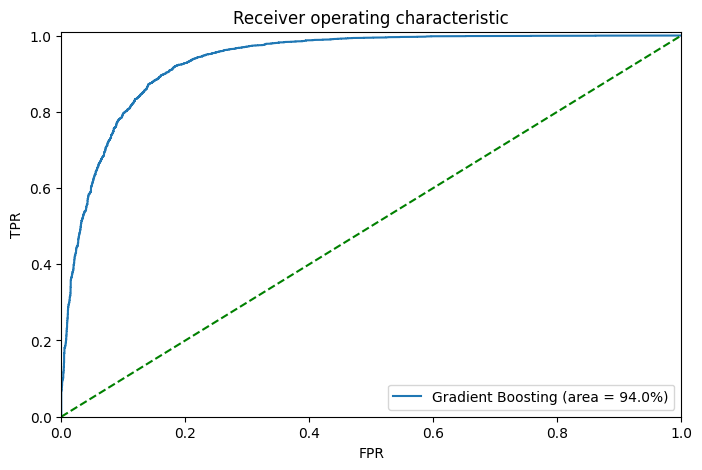

In [290]:
roc_auc = roc_auc_score(y_train_un, gb_model_un.predict_proba(X_train_un)[:,1]) # Getting the best auc roc score
fpr, tpr, thresholds = roc_curve(y_train_un, gb_model_un.predict_proba(X_train_un)[:,1])
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"Gradient Boosting (area = {round(roc_auc,2) * 100}%)")
plt.plot([0, 1], [0, 1], "g--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [291]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be at the top left corner of curve where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train_un, gb_model_un.predict_proba(X_train_un)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.45229884906546663


In [292]:
y_pred = gb_model_un.predict_proba(X_train_un)[:,1] > optimal_threshold_auc_roc 
print(classification_report(y_train_un, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      3738
           1       0.83      0.92      0.87      3738

    accuracy                           0.87      7476
   macro avg       0.87      0.87      0.87      7476
weighted avg       0.87      0.87      0.87      7476



In [293]:
y_pred = gb_model_un.predict_proba(X_test)[:,1] > optimal_threshold_auc_roc 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88     12013
           1       0.37      0.91      0.52      1551

    accuracy                           0.81     13564
   macro avg       0.68      0.85      0.70     13564
weighted avg       0.91      0.81      0.84     13564



In [294]:
importances = gb_model_un.feature_importances_
indices = np.argsort(importances)

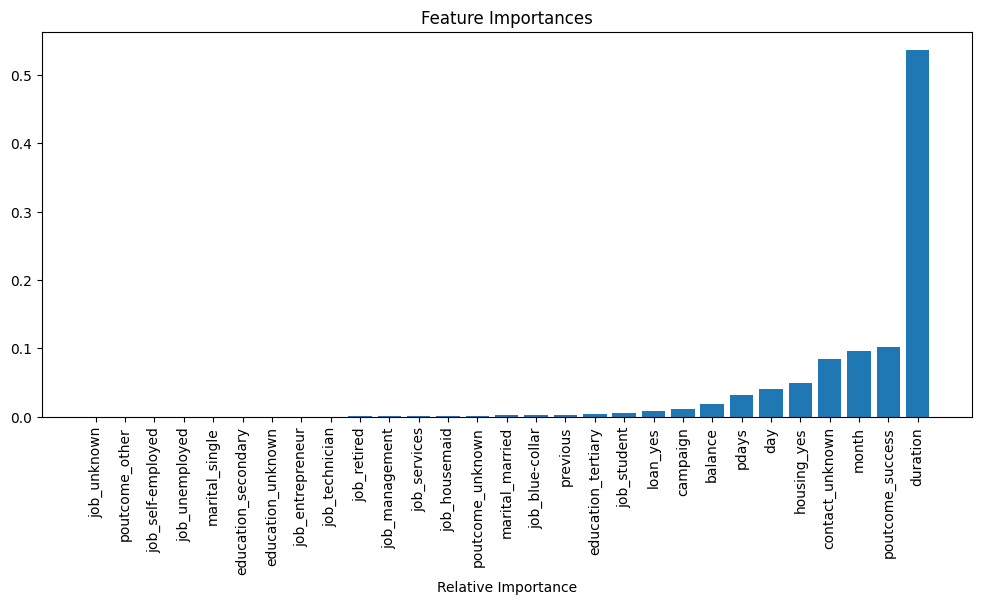

In [295]:
plt.figure(figsize=(12, 5))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [X_train_un.columns[i] for i in indices], rotation = 90)
plt.xlabel("Relative Importance")
plt.show()

## Observations:

The features having high contributions towards final outcome is (in descending order):
1. duration
2. poutcome success
3. month
4. contact_unknown
5. day
6. pdays
7. balance